<center><font size = "10"> Week 12 - Network Simulation III <center>
<center><font size = "8">Home Work <center>

<font size = "3">Please, write your group number and the names and surnames of the group members here
<br>Group number: 7
<br>Group member1: Joseph Tharayil
<br>Group member2: Kiyarash Farivar
<br>Group member3:

<font size='5'><font color='red'>__IMPORTANT!!__ Read the document "ReadBefore.pdf" before working on these homework

# Ex1. Simple network simulation

<font size='3'>Using the modules __sim__ and __specs__ from netpyne, create a simple network of soma neurons with three populations of 10 pyramidal cells each, using the standard compartmental Hodgkin-Huxley type cell (HH). Use the same morphological, physiological, synaptic and stimulation parameters from tutorial 01 for all the populations. Connect one of the cell populations to the other two using the same connection parameters (divergence, weight, delay, synMech) used in tutorial 01.
    
<font size='3'>Run a simulation of 500 ms, internal integration time steps of 0.025 ms and record steps time of 0.1 ms. Plot the raster plot of all the cells and the 2D network representation of the cell locations and connections. [1.5 pts]

In [1]:
from netpyne import specs, sim

%matplotlib inline

In [2]:
netParams = specs.NetParams() 

In [3]:
# Population parameters
netParams.popParams['pop1'] = {'cellType': 'PYR', 'numCells': 10, 'cellModel': 'HH'}
netParams.popParams['pop2'] = {'cellType': 'PYR', 'numCells': 10, 'cellModel': 'HH'}
netParams.popParams['pop3'] = {'cellType': 'PYR', 'numCells': 10, 'cellModel': 'HH'}

In [4]:
## Cell property rules
cellRule = {'conds': {'cellType': 'PYR'},  'secs': {}}  # cell rule dict
cellRule['secs']['soma'] = {'geom': {}, 'mechs': {}}   # soma params dict
cellRule['secs']['soma']['geom'] = {'diam': 18.8, 'L': 18.8, 'Ra': 123.0}  # soma geometry
cellRule['secs']['soma']['mechs']['hh'] = {'gnabar': 0.12, 'gkbar': 0.036, 'gl': 0.003, 'el': -70} # soma hh mechanism
netParams.cellParams['PYRrule'] = cellRule # add dict to list of cell params

In [5]:
## Synaptic mechanism parameters
netParams.synMechParams['exc'] = {'mod': 'Exp2Syn', 'tau1': 0.1, 'tau2': 5.0, 'e': 0}  # excitatory synaptic mechanism

In [6]:
# Stimulation parameters
netParams.stimSourceParams['bkg'] = {'type': 'NetStim', 'rate': 10, 'noise': 0.5}
netParams.stimTargetParams['bkg->PYR'] = {'source': 'bkg', 'conds': {'cellType': 'PYR'}, 'weight': 0.01, 'delay': 5, 'synMech': 'exc'}

In [7]:
## Cell connectivity rules
netParams.connParams['pop1->pop2&pop3'] = { #  cell2 -> cell1 label
    'preConds': {'pop': 'pop1'},        # conditions of presyn cells
    'postConds': {'pop': ['pop2','pop3']},       # conditions of postsyn cells
    'divergence': 12,                    # probability of connection
    'weight': 0.01,                      # synaptic weight
    'delay': 5,                          # transmission delay (ms)
    'synMech': 'exc'}                    # synaptic mechanism

In [8]:
# Simulation options
simConfig = specs.SimConfig()       # object of class SimConfig to store simulation configuration

simConfig.duration = 0.5*1e3          # Duration of the simulation, in ms
simConfig.dt = 0.025                # Internal integration timestep to use
simConfig.verbose = False           # Show detailed messages
simConfig.recordTraces = {'V_soma':{'sec':'soma','loc':0.5,'var':'v'}}  # Dict with traces to record
simConfig.recordStep = 0.1          # Step size in ms to save data (eg. V traces, LFP, etc)
simConfig.filename = 'model_output' # Set file output name
simConfig.savePickle = False        # Save params, network and sim output to pickle file
simConfig.saveJson = True 

# Plots
simConfig.analysis['plotRaster'] = True               # Plot a raster
simConfig.analysis['plot2Dnet'] = True                # plot 2D visualization of cell positions and connections


Start time:  2020-06-08 15:46:42.361801

Creating network of 3 cell populations on 1 hosts...
  Number of cells on node 0: 30 
  Done; cell creation time = 0.02 s.
Making connections...
  Number of connections on node 0: 120 
  Done; cell connection time = 0.02 s.
Adding stims...
  Number of stims on node 0: 30 
  Done; cell stims creation time = 0.00 s.
Recording 0 traces of 0 types on node 0

Running simulation for 500.0 ms...
  Done; run time = 0.48 s; real-time ratio: 1.04.

Gathering data...
  Done; gather time = 0.01 s.

Analyzing...
  Cells: 30
  Connections: 150 (5.00 per cell)
  Spikes: 364 (24.27 Hz)
  Simulated time: 0.5 s; 1 workers
  Run time: 0.48 s
Saving output as model_output.json  ... 
Finished saving!
  Done; saving time = 2.71 s.
Plotting raster...


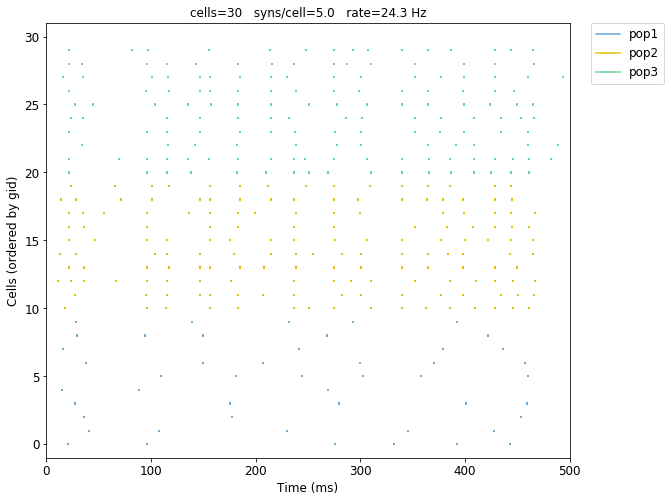

Plotting 2D representation of network cell locations and connections...


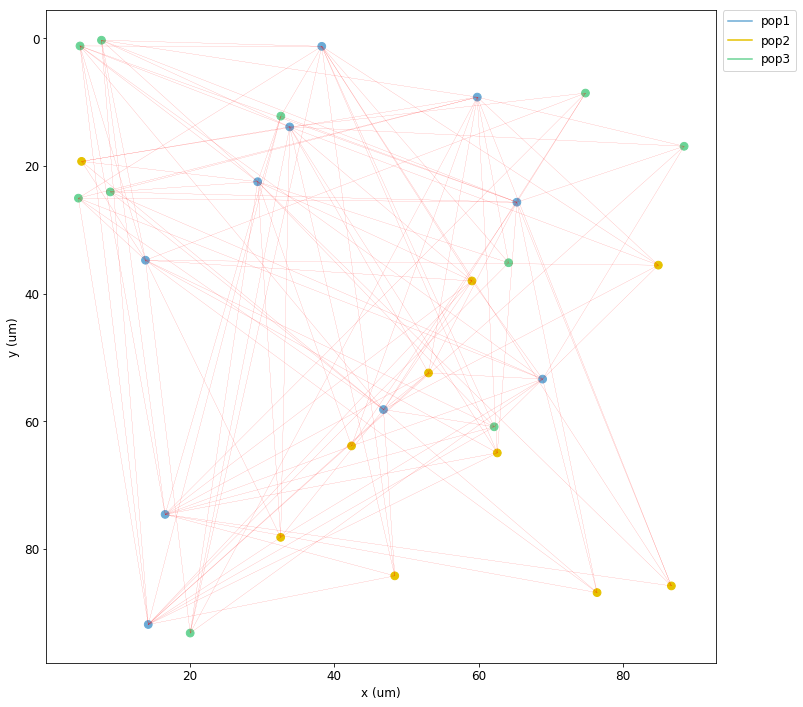

  Done; plotting time = 3.77 s

Total time = 7.02 s

End time:  2020-06-08 15:46:49.378633


In [9]:
# Create network and run simulation
sim.createSimulateAnalyze(netParams = netParams, simConfig = simConfig)

# Ex2. Mouse cortical network simulation

<font size='3'>Following the line of tutorial 02, build a cortical-like network of dimensions: x = 100 µm, y = 1210 µm and z = 100 µm. Find the layer thickness for the mouse cortex in the paper DeFelipe et al., 2002 loaded in the moodle and assign these values to your model. 
    
<font size='3'>Your network will have 400 cells in total: 4 cells in L1, 88 in L2/3, 100 in L4, 48 in L5 and 160 in L6. Cortical layer 1 is composed only by inhibitory cells and in the rest of the layers the proportion is 20% inhibitory cells and 80% of excitatory cells (these proportions are based on real mouse data). 
    
<font size='3'>Use the same morphological, physiological, synaptic and stimulation parameters from tutorial 02 for the excitatory and inhibitory cell populations.

<font size='3'>Connect the excitatory cells so they target cells within L2/3 to L6. Connect the inhibitory cells only to excitatory cells with a connection probability that decays exponentially as a function of distance '0.3*exp(-dist_3D/probLengthConst)'.
    
<font size='3'>Run a simulation of 1000 ms, internal integration time steps of 0.05 ms and record steps time of 1 ms. Plot the 2D network representation of the cell locations and connections and the connectivity matrix. [2.5 pts]


In [1]:
from netpyne import specs, sim

%matplotlib inline

In [2]:
# Network parameters
netParams = specs.NetParams()  # object of class NetParams to store the network parameters

netParams.sizeX = 100 # x-dimension (horizontal length) size in um
netParams.sizeY = 1210 # y-dimension (vertical height or cortical depth) size in um
netParams.sizeZ = 100 # z-dimension (horizontal length) size in um
netParams.propVelocity = 100.0 # propagation velocity (um/ms)
netParams.probLengthConst = 150.0 # length constant for conn probability (um)

In [13]:
## Population parameters
netParams.popParams['I1'] = {'cellType': 'I', 'numCells': 4, 'yRange': [0,69], 'cellModel': 'HH'}
netParams.popParams['E2'] = {'cellType': 'E', 'numCells': 70, 'yRange': [69,304], 'cellModel': 'HH'}
netParams.popParams['I2'] = {'cellType': 'I', 'numCells': 18, 'yRange': [69,304], 'cellModel': 'HH'}
netParams.popParams['E4'] = {'cellType': 'E', 'numCells': 80, 'yRange': [304,512], 'cellModel': 'HH'}
netParams.popParams['I4'] = {'cellType': 'I', 'numCells': 20, 'yRange': [304,512], 'cellModel': 'HH'}
netParams.popParams['E5'] = {'cellType': 'E', 'numCells': 38, 'yRange': [512,760], 'cellModel': 'HH'}
netParams.popParams['I5'] = {'cellType': 'I', 'numCells': 10, 'yRange': [512,760], 'cellModel': 'HH'}
netParams.popParams['E6'] = {'cellType': 'E', 'numCells': 128, 'yRange': [760,1210], 'cellModel': 'HH'}
netParams.popParams['I6'] = {'cellType': 'I', 'numCells': 32, 'yRange': [760,1210], 'cellModel': 'HH'}

In [14]:
## Cell property rules
cellRule = {'conds': {'cellType': 'E'},  'secs': {}}  # cell rule dict
cellRule['secs']['soma'] = {'geom': {}, 'mechs': {}}                              # soma params dict
cellRule['secs']['soma']['geom'] = {'diam': 15, 'L': 14, 'Ra': 120.0}                   # soma geometry
cellRule['secs']['soma']['mechs']['hh'] = {'gnabar': 0.13, 'gkbar': 0.036, 'gl': 0.003, 'el': -70}      # soma hh mechanism
netParams.cellParams['Erule'] = cellRule                          # add dict to list of cell params

cellRule = {'conds': {'cellType': 'I'},  'secs': {}}  # cell rule dict
cellRule['secs']['soma'] = {'geom': {}, 'mechs': {}}                              # soma params dict
cellRule['secs']['soma']['geom'] = {'diam': 10.0, 'L': 9.0, 'Ra': 110.0}                  # soma geometry
cellRule['secs']['soma']['mechs']['hh'] = {'gnabar': 0.11, 'gkbar': 0.036, 'gl': 0.003, 'el': -70}      # soma hh mechanism
netParams.cellParams['Irule'] = cellRule                          # add dict to list of cell params

In [15]:
## Synaptic mechanism parameters
netParams.synMechParams['exc'] = {'mod': 'Exp2Syn', 'tau1': 0.8, 'tau2': 5.3, 'e': 0}  # NMDA synaptic mechanism
netParams.synMechParams['inh'] = {'mod': 'Exp2Syn', 'tau1': 0.6, 'tau2': 8.5, 'e': -75}  # GABA synaptic mechanism

In [16]:
# Stimulation parameters
netParams.stimSourceParams['bkg'] = {'type': 'NetStim', 'rate': 20, 'noise': 0.3}
netParams.stimTargetParams['bkg->all'] = {'source': 'bkg', 'conds': {'cellType': ['E','I']}, 'weight': 0.01, 'delay': 'max(1, normal(5,2))', 'synMech': 'exc'}

In [17]:
netParams.connParams['E->all'] = {
  'preConds': {'cellType': 'E'}, 'postConds': {'y': [69,1210]},  #  E -> all (100-1000 um)
  'probability': 0.1 ,                  # probability of connection
  'weight': '0.005*post_ynorm',         # synaptic weight
  'delay': 'dist_3D/propVelocity',      # transmission delay (ms)
  'synMech': 'exc'}                     # synaptic mechanism

In [18]:
netParams.connParams['I->E'] = {
  'preConds': {'cellType': 'I'}, 'postConds': {'pop': ['E2','E4','E5','E6']},   #  I -> E
  'probability': '0.3*exp(-dist_3D/probLengthConst)',   # probability of connection
  'weight': 0.001,                                      # synaptic weight
  'delay': 'dist_3D/propVelocity',                      # transmission delay (ms)
  'synMech': 'inh'}                                     # synaptic mechanism


Start time:  2020-05-25 02:32:04.072781

Creating network of 9 cell populations on 1 hosts...
  Number of cells on node 0: 400 
  Done; cell creation time = 0.04 s.
Making connections...
  Number of connections on node 0: 14086 
  Done; cell connection time = 2.26 s.
Adding stims...
  Number of stims on node 0: 400 
  Done; cell stims creation time = 0.09 s.
Recording 0 traces of 0 types on node 0

Running simulation for 1000.0 ms...
  Done; run time = 29.57 s; real-time ratio: 0.03.

Gathering data...
  Done; gather time = 1.24 s.

Analyzing...
  Cells: 400
  Connections: 14486 (36.22 per cell)
  Spikes: 6699 (16.75 Hz)
  Simulated time: 1.0 s; 1 workers
  Run time: 29.57 s
  Done; saving time = 0.05 s.
Plotting 2D representation of network cell locations and connections...


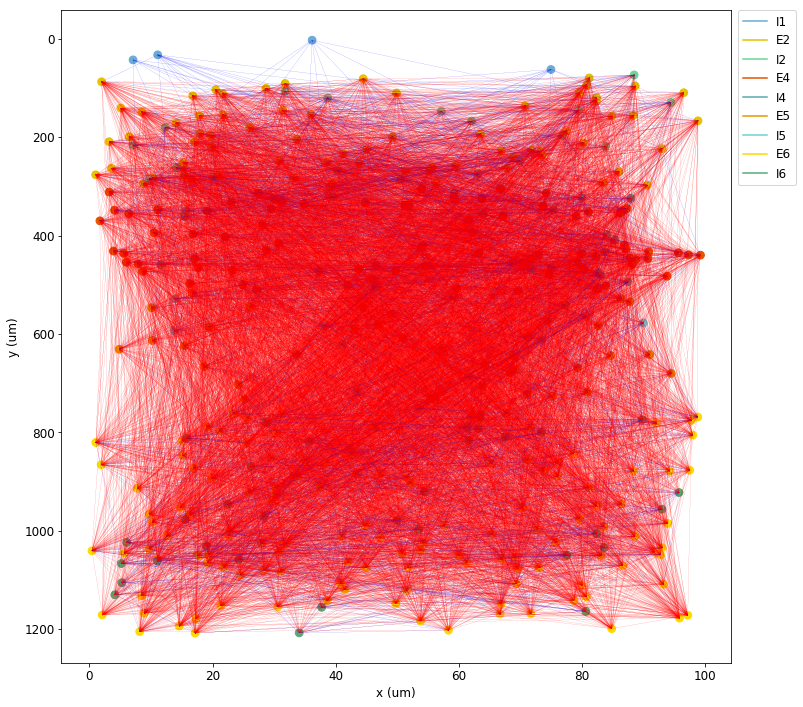

Plotting connectivity matrix...


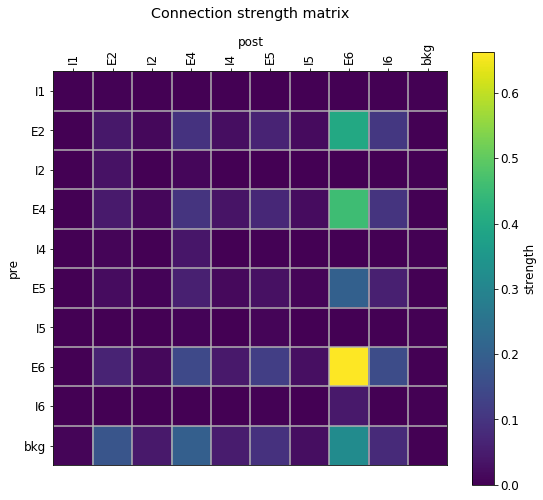

  Done; plotting time = 131.84 s

Total time = 165.12 s

End time:  2020-05-25 02:34:49.197068


In [19]:
# Simulation options
simConfig = specs.SimConfig()        # object of class SimConfig to store simulation configuration

simConfig.duration = 1*1e3           # Duration of the simulation, in ms
simConfig.dt = 0.05                 # Internal integration timestep to use
simConfig.verbose = False            # Show detailed messages
simConfig.recordTraces = {'V_soma':{'sec':'soma','loc':0.5,'var':'v'}}  # Dict with traces to record
simConfig.recordStep = 1             # Step size in ms to save data (e.g. V traces, LFP, etc)
simConfig.filename = 'model_output'  # Set file output name
simConfig.savePickle = False         # Save params, network and sim output to pickle file

#simConfig.analysis['plotRaster'] = {'orderBy': 'y', 'orderInverse': True}      # Plot a raster
#simConfig.analysis['plotTraces'] = {'include': [('E2',0), ('E5', 5)]}      # Plot recorded traces for this list of cells
simConfig.analysis['plot2Dnet'] = True           # plot 2D visualization of cell positions and connections
simConfig.analysis['plotConn'] = True           # plot connectivity matrix

# Create network and run simulation
sim.createSimulateAnalyze(netParams = netParams, simConfig = simConfig)

# Ex3. Detailed cell morphology network

<font size='3'>You are going to build a network with the set of cells asigned to your group in week2. First you have to create a .py file per each morphology with the morphological and biophysical characteristics for each cell. You can use the biophysics used on the previous tutorials.
    
<font size='3'>Create 5 populations of cells with 5 cells each and the 3D compartmental Hodgkin-Huxley type cell (HH3D) taking care of the differences between pyramidal (E) and inhibitory cells (I). Connect the two inhibitory cell populations to the excitatory cell populations but no between them. Run a simulation of 300 ms. Use the same synaptic and stimulation parameters used in tutorial 03. Plot the rater plot, the 2D network representation of the cell locations and connections and the connectivity matrix. [2 pts]

In [1]:
from netpyne import specs, sim

%matplotlib inline

In [2]:
netParams = specs.NetParams() 

In [3]:
## Population parameters
netParams.popParams['E1'] = {'cellType': 'E', 'numCells': 5, 'cellModel': 'HH3D'}
netParams.popParams['E2'] = {'cellType': 'E', 'numCells': 5, 'cellModel': 'HH3D'}
netParams.popParams['E3'] = {'cellType': 'E', 'numCells': 5, 'cellModel': 'HH3D'}

netParams.popParams['I1'] = {'cellType': 'I', 'numCells': 5, 'cellModel': 'HH3D'}
netParams.popParams['I2'] = {'cellType': 'I', 'numCells': 5, 'cellModel': 'HH3D'}

In [4]:
folder = 'ex3_files/'

cellRule = netParams.importCellParams(label='E1', conds={'pop': 'E1', 'cellModel': 'HH3D'},
        fileName=folder+'E1.py', cellName='E1', importSynMechs=True)
netParams.cellParams['E1rule'] = cellRule  

cellRule = netParams.importCellParams(label='E2', conds={'pop': 'E2', 'cellModel': 'HH3D'},
        fileName=folder+'E2.py', cellName='E2', importSynMechs=True)
netParams.cellParams['E2rule'] = cellRule 

cellRule = netParams.importCellParams(label='E3', conds={'pop': 'E3', 'cellModel': 'HH3D'},
        fileName=folder+'E3.py', cellName='E3', importSynMechs=True)
netParams.cellParams['E3rule'] = cellRule 



cellRule = netParams.importCellParams(label='I1', conds={'pop': 'I1', 'cellModel': 'HH3D'},
        fileName=folder+'I1.py', cellName='I1', importSynMechs=True)
netParams.cellParams['I1rule'] = cellRule 

cellRule = netParams.importCellParams(label='I2', conds={'pop': 'I2', 'cellModel': 'HH3D'},
        fileName=folder+'I2.py', cellName='I2', importSynMechs=True)
netParams.cellParams['I2rule'] = cellRule 

error ../week7/morphs/morph_02.swc line 36377: could not parse: 
error ../week7/morphs/morph_09.swc line 13198: could not parse: 
error ../week7/morphs/morph_10.swc line 18854: could not parse: 
error ../week7/morphs/morph_08.swc line 14319: could not parse: 
error ../week7/morphs/morph_04.swc line 6922: could not parse: 


In [5]:
## Synaptic mechanism parameters
netParams.synMechParams['exc'] = {'mod': 'Exp2Syn', 'tau1': 0.8, 'tau2': 5.3, 'e': 0}  # NMDA synaptic mechanism
netParams.synMechParams['inh'] = {'mod': 'Exp2Syn', 'tau1': 0.6, 'tau2': 8.5, 'e': -75}  # GABA synaptic mechanism

In [6]:
# Stimulation parameters
netParams.stimSourceParams['bkg'] = {'type': 'NetStim', 'rate': 20, 'noise': 0.3}
netParams.stimTargetParams['bkg->all'] = {'source': 'bkg', 'conds': {'cellType': ['E','I']}, 'weight': 0.1, 'delay': 'max(1, normal(5,2))', 'synMech': 'exc'}

In [7]:
## Cell connectivity rules
netParams.connParams['I->E'] = { #  I1 -> E1 label
    'preConds': {'cellType': 'I'},   # conditions of presyn cells
    'postConds': {'cellType': 'E'},  # conditions of postsyn cells
    'divergence': 12,            # probability of connection
    'weight': 0.5,               # synaptic weight
    'delay': 5,                  # transmission delay (ms)
    'synMech': 'inh'}            # synaptic mechanism   

In [8]:
# Simulation options
simConfig = specs.SimConfig()           # object of class SimConfig to store simulation configuration

simConfig.duration = 0.3*1e3            # Duration of the simulation, in ms
simConfig.dt = 0.025                    # Internal integration timestep to use
simConfig.verbose = False               # Show detailed messages
simConfig.recordTraces = {'V_soma':{'sec':'soma','loc':0.5,'var':'v'}}  # Dict with traces to record
simConfig.recordStep = 0.1              # Step size in ms to save data (eg. V traces, LFP, etc)
simConfig.filename = 'model_output'     # Set file output name
simConfig.savePickle = False            # Save params, network and sim output to pickle file
simConfig.saveJson = True 

# Plots
simConfig.analysis['plotRaster'] = True       # Plot a raster
simConfig.analysis['plot2Dnet'] = True        # plot 2D visualization of cell positions and connections
simConfig.analysis['plotConn'] = True           # plot connectivity matrix


Start time:  2020-06-08 18:00:41.134608

Creating network of 5 cell populations on 1 hosts...
  Number of cells on node 0: 25 
  Done; cell creation time = 11.59 s.
Making connections...
  Number of connections on node 0: 120 
  Done; cell connection time = 0.01 s.
Adding stims...
  Number of stims on node 0: 25 
  Done; cell stims creation time = 0.00 s.
Recording 0 traces of 0 types on node 0

Running simulation for 300.0 ms...
  Done; run time = 127.77 s; real-time ratio: 0.00.

Gathering data...
  Done; gather time = 10.58 s.

Analyzing...
  Cells: 25
  Connections: 145 (5.80 per cell)
  Spikes: 77 (10.27 Hz)
  Simulated time: 0.3 s; 1 workers
  Run time: 127.77 s
Saving output as model_output.json  ... 
Finished saving!
  Done; saving time = 29.14 s.
Plotting raster...


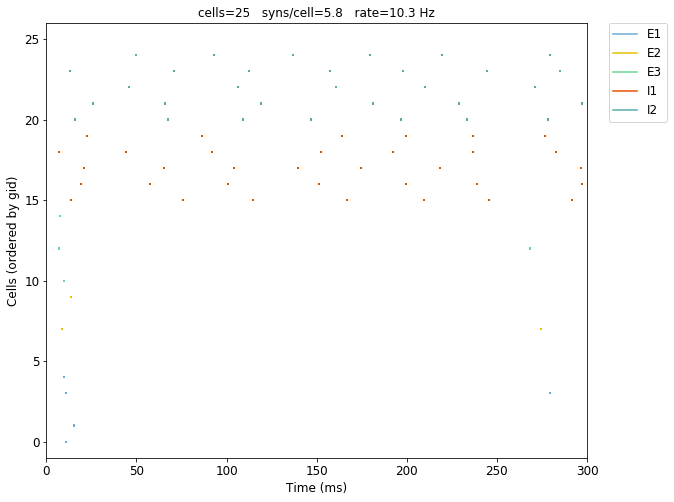

Plotting 2D representation of network cell locations and connections...


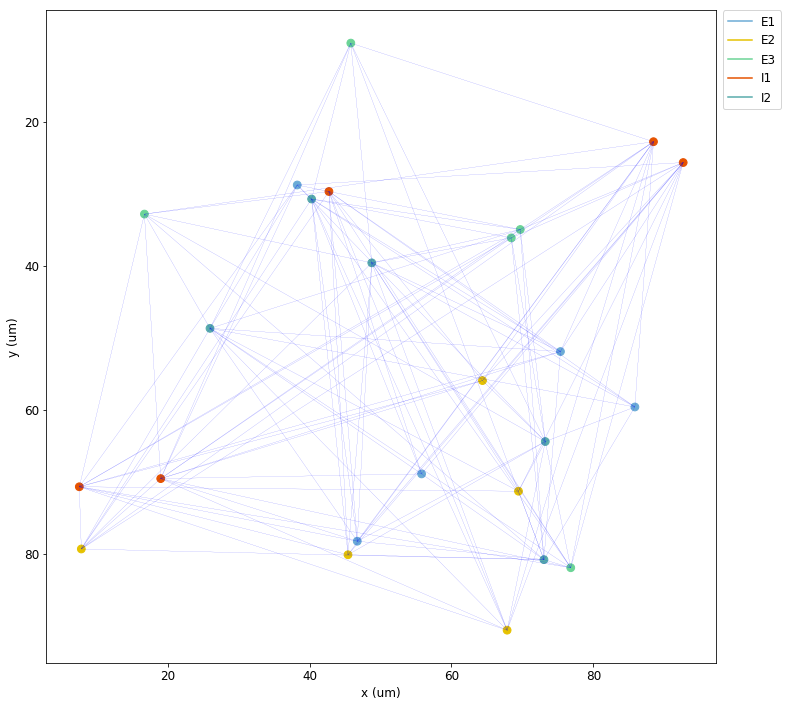

Plotting connectivity matrix...


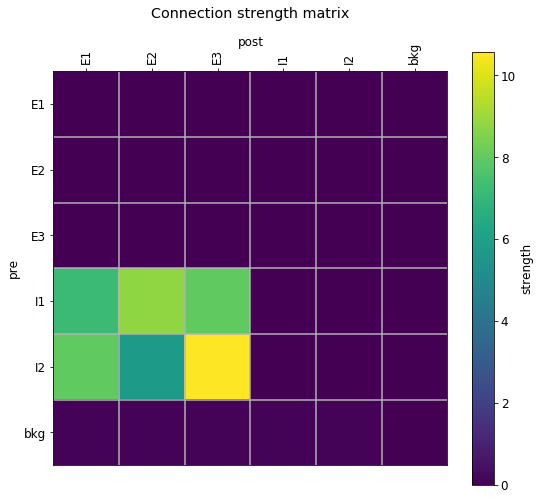

  Done; plotting time = 5.14 s

Total time = 184.41 s

End time:  2020-06-08 18:03:45.543718


In [9]:
# Create network and run simulation
sim.createSimulateAnalyze(netParams = netParams, simConfig = simConfig)